In [ ]:
import pandas as pd
df = pd.read_csv('/content/diabetes-dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
df.shape

(253680, 22)

In [ ]:
X = df.drop('Outcome',axis='columns')
Y = df[['Outcome']]

In [ ]:
df[['Outcome']].value_counts()

Outcome
0          1316
1           684
dtype: int64

In [ ]:
df['Outcome'].unique()

array([1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dmodel = DecisionTreeClassifier(max_depth=12)

In [ ]:
dmodel.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=12)

In [ ]:
print(dmodel.score(xtrain,ytrain))
print(dmodel.score(xtest,ytest))

0.9706666666666667
0.93


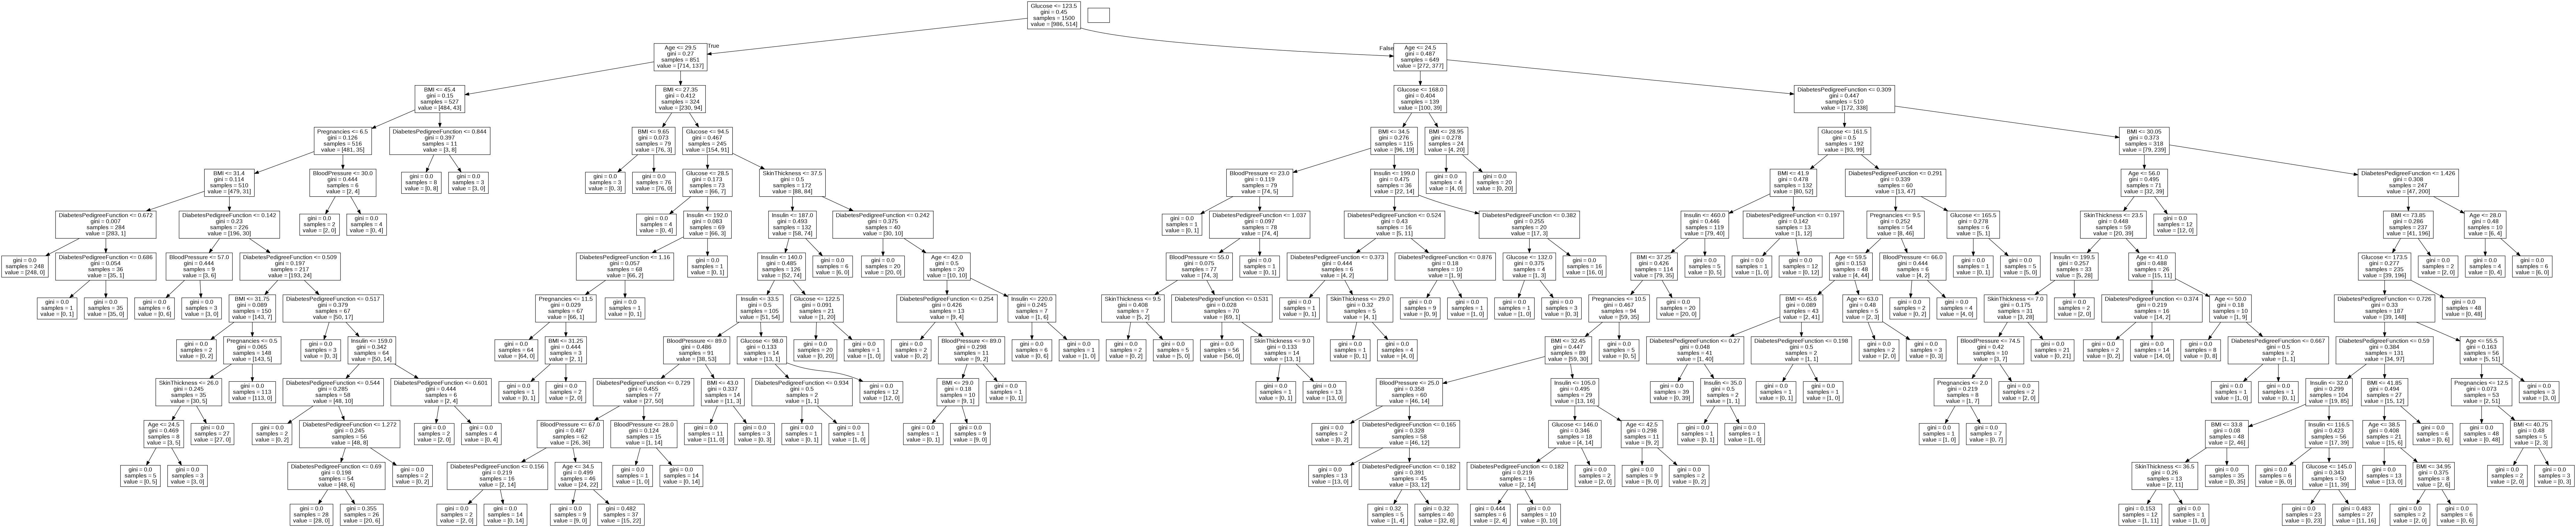

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(dmodel,feature_names=xtrain.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(ytrain,dmodel.predict(xtrain))

array([[956,  30],
       [ 14, 500]])

In [ ]:
confusion_matrix(ytest,dmodel.predict(xtest))

array([[317,  13],
       [ 22, 148]])

#Randon Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(n_estimators=50,max_depth=7)

rmodel.fit(xtrain,ytrain)

print(rmodel.score(xtrain,ytrain))
print(rmodel.score(xtest,ytest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.948
0.888


In [ ]:
confusion_matrix(ytrain,rmodel.predict(xtrain))

array([[962,  24],
       [ 54, 460]])

In [ ]:
confusion_matrix(ytest,rmodel.predict(xtest))

array([[312,  18],
       [ 38, 132]])